#### Census Data Analysis -- Age

In [2]:
# necessary imports

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

#reading in data

populationDemographics = pd.read_csv('../../data/clean/population_demographics.csv')

In [3]:
# selecting relevant columns from overall populationDemographics dataframe
raceOnly = populationDemographics[['geoid','geometry','qualifying name', 'total population', 'total population: white alone', 
                                   'total population: black or african american alone',
                                   'total population: american indian and alaska native alone',
                                   'total population: asian alone', 
                                   'total population: native hawaiian and other pacific islander alone', 
                                   'total population: some other race alone', 
                                   'total population: two or more races']]


The following cell plots a heat map of the percent of each community that is black

Text(0.5, 1.0, 'Percent Black per Census Tract')

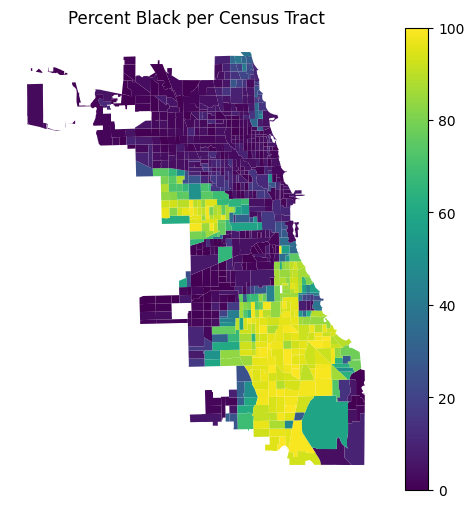

In [188]:
# this cell makes a copy of the raceOnly data frame so we can manipulate without affecting our primary dataset
blackRaceOnly = raceOnly.copy(deep=True)

# this cell calculates the percent of each census tract that is black and appends a column with those values to the data frame
blackRaceOnly['percent black'] = (blackRaceOnly['total population: black or african american alone']/blackRaceOnly['total population'])*100

# the following converts the data frame to a geo data frame and plots estimated percent of black members of each community
blackRaceOnly = gpd.GeoDataFrame(
    blackRaceOnly.loc[:, [c for c in blackRaceOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(blackRaceOnly["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(6, 6))
blackRaceOnly.plot(column='percent black', legend=True, ax=ax)
ax.axis('off')
ax.set_title('Percent Black per Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})

From this map, we see how black communities are concentrated in two regions of Chicago. We can compare this against the locations of libraries.

The following cell plots a heat map of the percent of each community that is asian

Text(0.5, 1.0, 'Percent Asian per Census Tract')

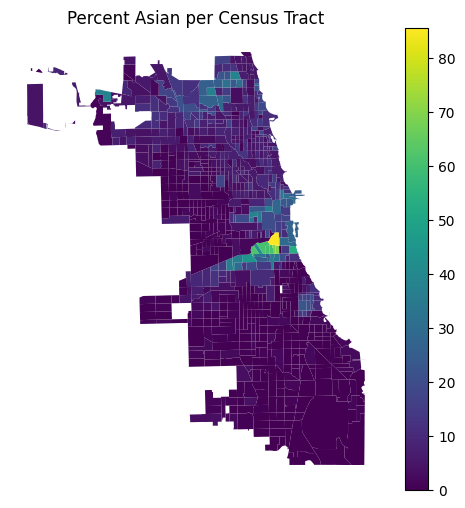

In [5]:
# this  makes a copy of the raceOnly data frame so we can manipulate without affecting our primary dataset
asianRaceOnly = raceOnly.copy(deep=True)

# this calculates the percent of each census tract that is black and appends a column with those values to the data frame
asianRaceOnly['percent asian'] = (asianRaceOnly['total population: asian alone']/asianRaceOnly['total population'])*100

# the following converts the data frame to a geo data frame and plots estimated percent of black members of each community
asianRaceOnly = gpd.GeoDataFrame(
    asianRaceOnly.loc[:, [c for c in asianRaceOnly.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(asianRaceOnly["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(6, 6))
asianRaceOnly.plot(column='percent asian', legend=True, ax=ax)
ax.axis('off')
ax.set_title('Percent Asian per Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})

From this map, we see that there is a large asian population concentrated in Chinatown and nearby areas. 

The following two cells work together to generate a map labelling each community by most populous racial group

In [9]:
# this  makes a copy of the raceOnly data frame so we can manipulate without affecting our primary dataset
populousRace = raceOnly.copy(deep=True)

# this makes a new array in which we can enter the most populous racial group of each community
mostPopulousRace = []
    
# this for loop iterates through the data frame to find the most populous racial group in each census track and appends it to the new array. 
for index, row in populousRace.iterrows():
    count = row['total population: black or african american alone']
    race = 'black'
    if row['total population: american indian and alaska native alone']>count:
        count = row['total population: american indian and alaska native alone']
        race = 'american native'
    elif row['total population: asian alone']>count:
        count = row['total population: asian alone']
        race = 'asian'
    elif row['total population: native hawaiian and other pacific islander alone']>count:
        count = row['total population: native hawaiian and other pacific islander alone']
        race = 'native pacific islander'
    elif row['total population: some other race alone']>count:
        count = row['total population: some other race alone']
        race = 'other'
    elif row['total population: two or more races']>count:
        count = row['total population: two or more races']
        race = 'two or more races'
    mostPopulousRace.append(race)
#print(mostPopulousRace)
    
# this line appends the new column with most populous race to the data frame created in this cell
populousRace['most populous race']= mostPopulousRace

Text(0.5, 1.0, 'Most Populous Race by Census Tract')

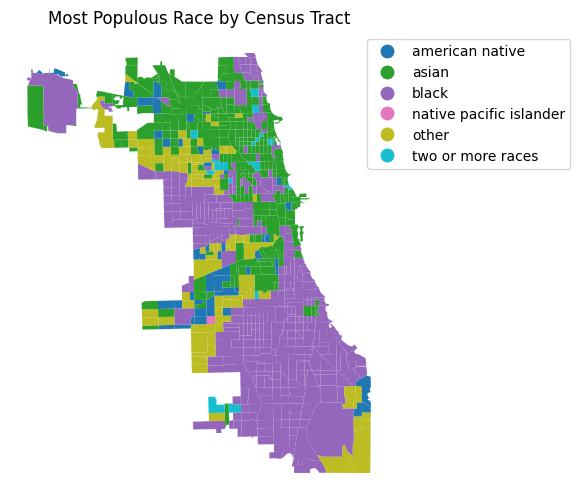

In [10]:
# the following converts the data frame to a geo data frame and plots the most populous racial groups by census tract

populousRace = gpd.GeoDataFrame(
    populousRace.loc[:, [c for c in populousRace.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(populousRace["geometry"]),
    crs="epsg:4326",
    )

fig, ax = plt.subplots(1, figsize=(10, 6))
populousRace.plot("most populous race", legend = True, legend_kwds={'bbox_to_anchor': (1.5, 1)}, ax=ax)
ax.axis('off')
ax.set_title('Most Populous Race by Census Tract', fontdict={'fontsize': '12', 'fontweight' : '3'})

From this map, we see the effects of redlining and how Chicago is primarily structured in enclaves. 